In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

# Data Cleansing
df_original['job_posted_date'] = pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills'] = df_original['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_altered = df_original.copy()

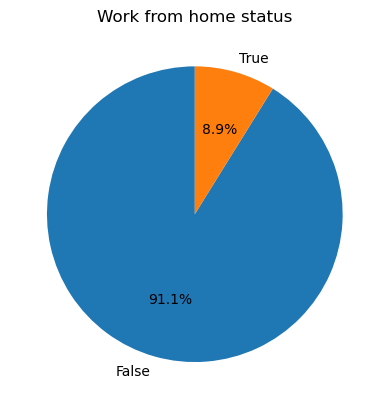

In [18]:
df_altered.value_counts('job_work_from_home').plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work from home status')
plt.ylabel('')
plt.show()

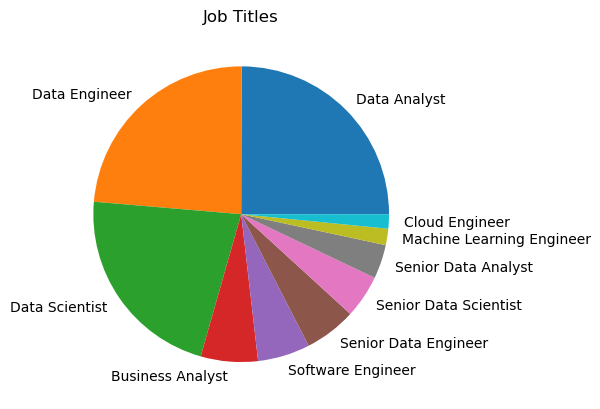

In [9]:
df_altered.value_counts('job_title_short').plot(kind='pie')
plt.title('Job Titles')
plt.ylabel('')
plt.show()

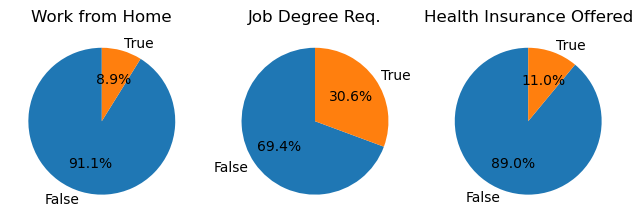

In [32]:
fig, ax = plt.subplots(1, 3)
dict_column = {
    'job_work_from_home': 'Work from Home', 
    'job_no_degree_mention': 'Job Degree Req.', 
    'job_health_insurance': 'Health Insurance Offered'
    }
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_altered[column].value_counts(), startangle=90, autopct='%1.1f%%', labels = ['False', 'True'])
    ax[i].set_title(title)
fig.tight_layout()
plt.show()